In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
data.drop(['Email','Avatar','Address'],axis=1,inplace=True)

<AxesSubplot:>

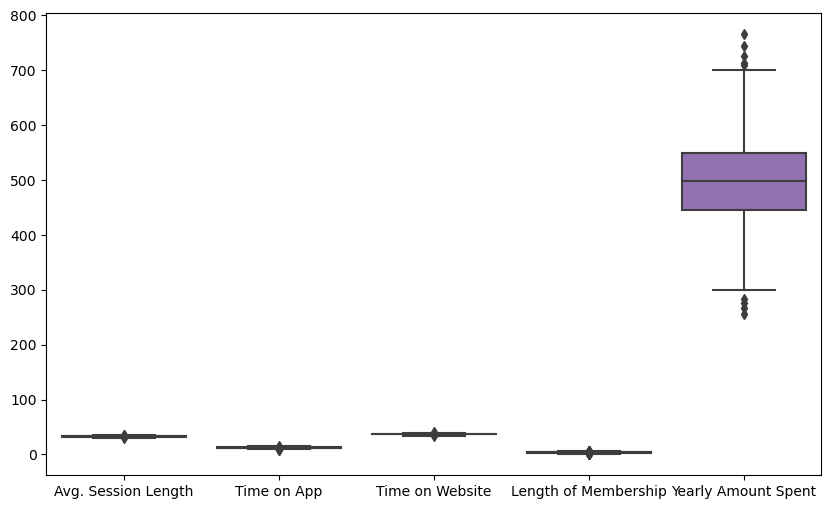

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)

<AxesSubplot:>

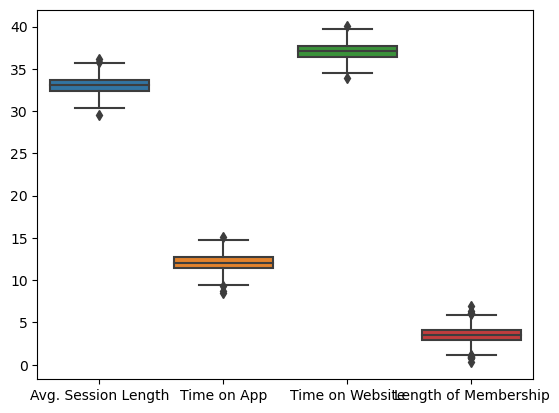

In [9]:
sns.boxplot(data=data.iloc[:,:-1])

<Figure size 1000x600 with 0 Axes>

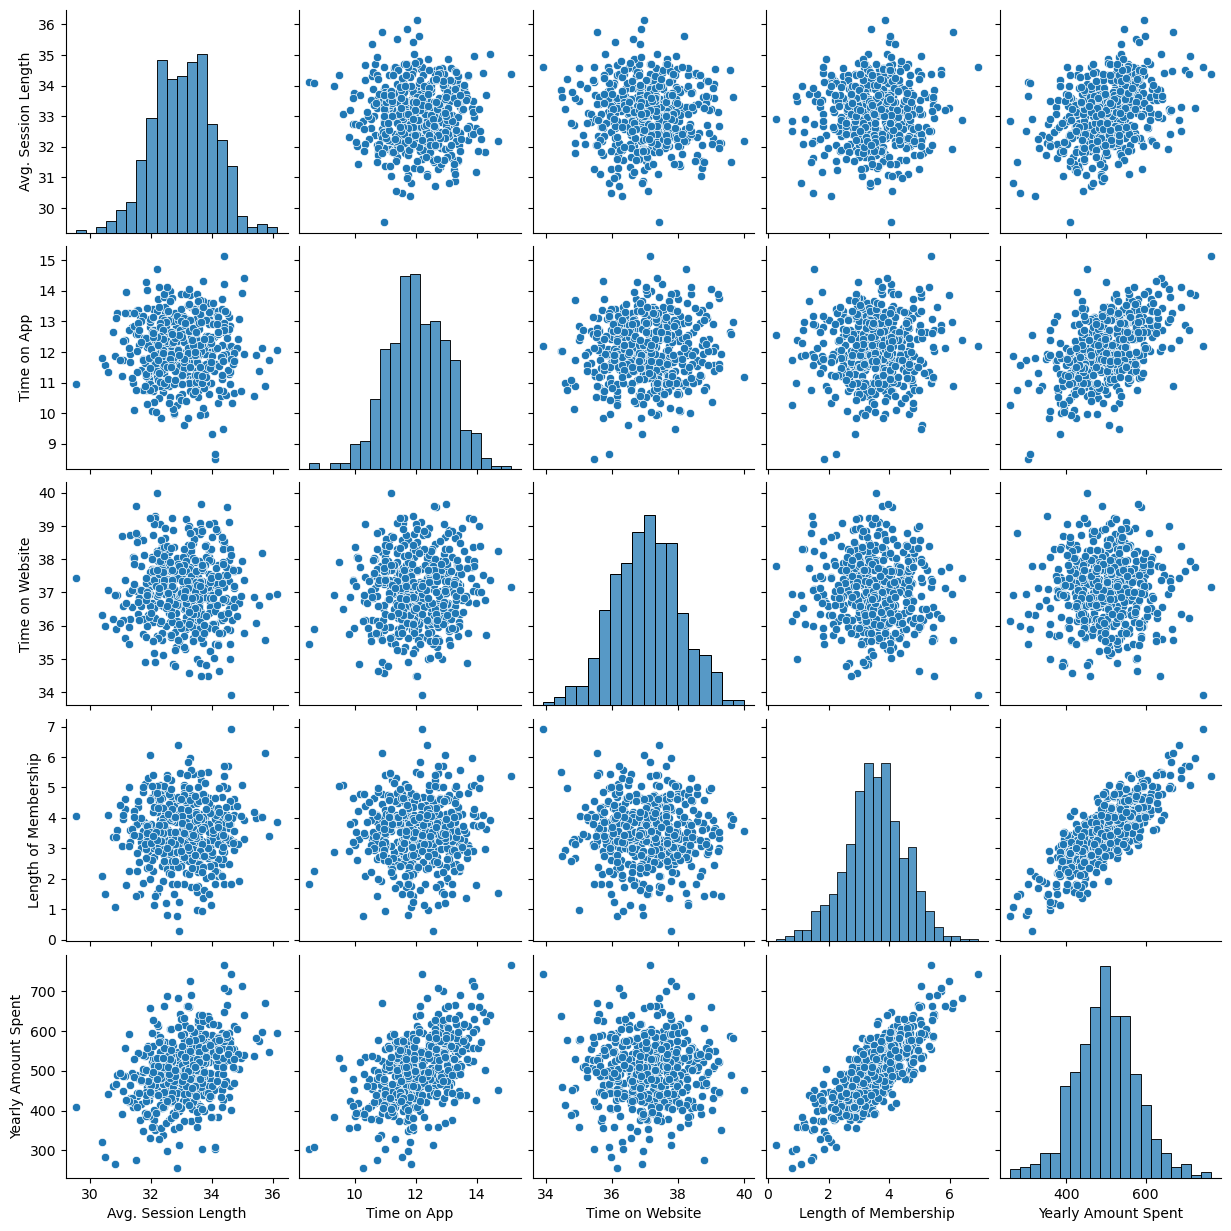

In [10]:
plt.figure(figsize=(10,6))
sns.pairplot(data=data)

<Figure size 1000x600 with 0 Axes>

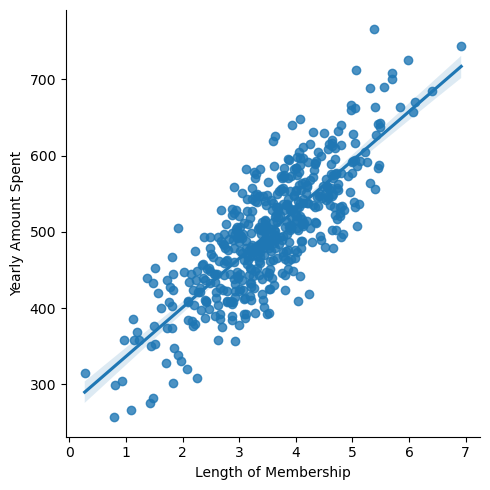

In [11]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [14]:
import statsmodels.api as sm
X = data['Length of Membership']
X = np.c_[X,[1]*len(X)] #상수항을 넣어주는 것!
y = data['Yearly Amount Spent']
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 08 Mar 2023   Prob (F-statistic):          4.81e-117
Time:                         15:04:08   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred = lm.predict(X)

sns.scatterplot(x=X[:,0],y=y)
plt.plot(X[:,0],pred,'r',ls='dashed',lw=3)
plt.title('result of lm')

plt.show()

Text(0.5, 1.0, 'True vs predict')

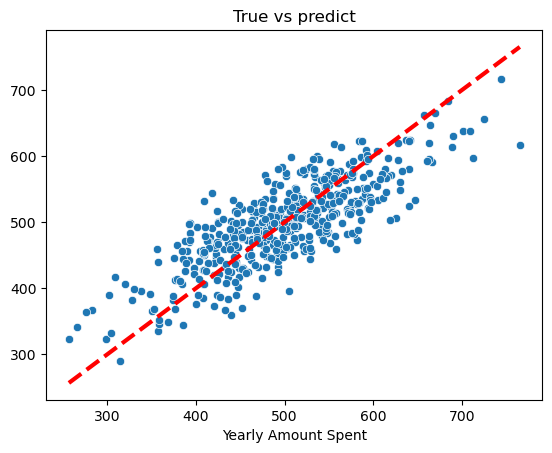

In [23]:
pred = lm.predict(X)
sns.scatterplot(x=y,y=pred)
plt.plot([min(y),max(y)],[min(y),max(y)],'r',ls='dashed',lw=3)
plt.title('True vs predict')

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent',axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13)
X_train = np.c_[X_train,[1]*len(X_train)] #상수항을 넣어주는 것!
X_test = np.c_[X_test,[1]*len(X_test)] #상수항을 넣어주는 것!
lm = sm.OLS(y_train,X_train).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5089.
Date:                 Wed, 08 Mar 2023   Prob (F-statistic):          3.18e-305
Time:                         15:25:28   Log-Likelihood:                -1309.4
No. Observations:                  350   AIC:                             2629.
Df Residuals:                      345   BIC:                             2648.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            25.6884      0.550     46.726      0.000      24.607      26.770
x2            38.7235      0.550     70.401      0.000      37.642      39.805
x3             0.2527      0.541      0.467      0.641      -0.812       1.317
x4            61.8923      0.572    108.229      0.000      60.767      63.017
const      -1044.1632     28.038    -37.242      0.000   -1099.309    -989.017
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.942
Skew:                          -0.092   Prob(JB):                        0.624
Kurtosis:                       3.176   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'True vs Predict')

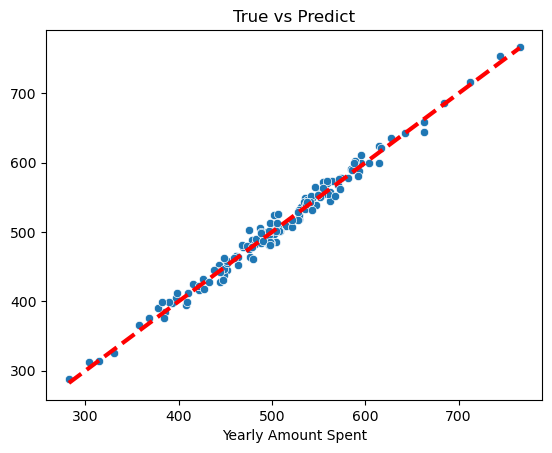

In [32]:
pred = lm.predict(X_test)
sns.scatterplot(x=y_test,y=pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'r',ls='dashed',lw=3)
plt.title('True vs Predict')